In [2]:
import keras 
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv1D, MaxPooling1D, LSTM,Conv1DTranspose,UpSampling1D,AveragePooling1D
from keras import backend as K 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.decomposition import KernelPCA,PCA
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
import pickle
from keras.models import Model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras.models import Sequential 
# from focal_loss import binary_focal_loss

In [3]:
df=pd.read_csv("dataset_0-32000_1-25000.csv")

In [4]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,SepsisLabel,SIRS
0,0,80.147727,97.295455,37.080909,106.068182,59.924318,39.641932,16.625000,-0.022727,25.590909,...,3.415909,4.229545,27.227273,9.212500,28.675000,12.561364,248.795455,77.0,0.0,1.0
1,1,80.867647,97.338235,36.910294,99.294118,62.132647,44.860294,17.426471,-0.514706,25.794118,...,3.385294,4.238235,29.480882,9.967647,43.573529,11.250000,118.676471,79.0,0.0,0.0
2,2,89.638889,97.583333,37.046667,120.194444,77.648333,54.069722,19.916667,5.666667,30.944444,...,3.861111,4.133333,31.594444,10.761111,30.366667,13.483333,406.333333,81.0,0.0,1.0
3,3,81.391892,97.662162,36.869730,114.587838,84.567748,67.534054,19.108108,-0.756757,23.621622,...,2.948649,3.951351,33.808108,11.640541,72.045946,9.929730,153.864865,57.0,0.0,0.0
4,4,98.000000,97.473684,37.222632,110.657895,74.948421,57.816842,20.894737,0.710526,24.157895,...,3.231579,4.126316,28.336842,9.352632,34.463158,18.244737,615.157895,28.0,0.0,3.0


In [5]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,SepsisLabel,SIRS
0,80.147727,97.295455,37.080909,106.068182,59.924318,39.641932,16.625000,-0.022727,25.590909,0.526136,...,3.415909,4.229545,27.227273,9.212500,28.675000,12.561364,248.795455,77.0,0.0,1.0
1,80.867647,97.338235,36.910294,99.294118,62.132647,44.860294,17.426471,-0.514706,25.794118,0.576471,...,3.385294,4.238235,29.480882,9.967647,43.573529,11.250000,118.676471,79.0,0.0,0.0
2,89.638889,97.583333,37.046667,120.194444,77.648333,54.069722,19.916667,5.666667,30.944444,0.583333,...,3.861111,4.133333,31.594444,10.761111,30.366667,13.483333,406.333333,81.0,0.0,1.0
3,81.391892,97.662162,36.869730,114.587838,84.567748,67.534054,19.108108,-0.756757,23.621622,0.467568,...,2.948649,3.951351,33.808108,11.640541,72.045946,9.929730,153.864865,57.0,0.0,0.0
4,98.000000,97.473684,37.222632,110.657895,74.948421,57.816842,20.894737,0.710526,24.157895,0.513158,...,3.231579,4.126316,28.336842,9.352632,34.463158,18.244737,615.157895,28.0,0.0,3.0


In [6]:
df.SepsisLabel.value_counts()

0.0    32000
1.0    25000
Name: SepsisLabel, dtype: int64

<AxesSubplot:>

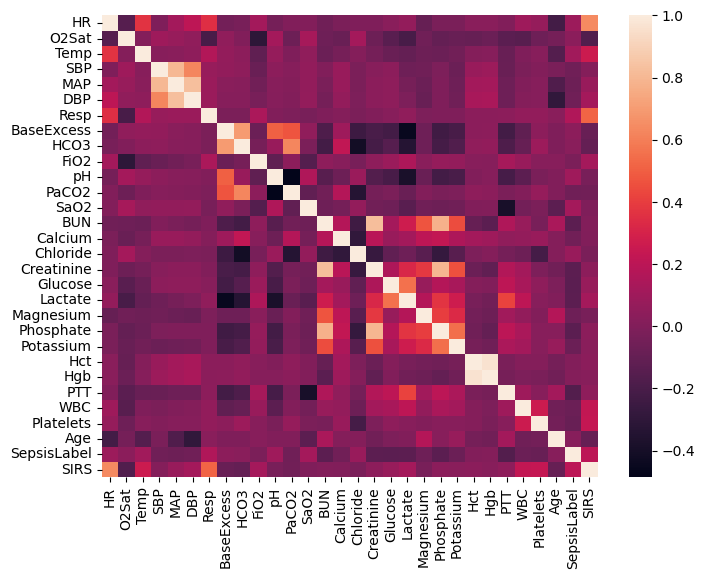

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [8]:
def find_correlated_features(df, threshold, target_variable):
    # remove target column
    df = df.drop(columns=target_variable).copy()
    # Get correlation matrix
    corr_matrix = df.corr().abs()
    # Take half of the matrix to prevent doubling results
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
    # Restructure correlation matrix to dataframe
    df = corr_matrix.stack().reset_index()
    df.columns = ['feature1', 'feature2', 'corr_coef']
    # Apply filter and sort coefficients
    df = df[df.corr_coef >= threshold].sort_values('corr_coef', ascending=False)
    return df

In [9]:
corr_data=find_correlated_features(df,0.2,'SepsisLabel')

C:\Users\Admin\AppData\Local\Temp\ipykernel_21568\1940588877.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


In [10]:
X=df.drop('SepsisLabel',axis=1)
y=df['SepsisLabel']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify=y)

In [20]:
X_train_selected=X_train[['FiO2', 'O2Sat', 'Magnesium', 'SaO2', 'Lactate', 'pH', 'BaseExcess','Potassium',
                          'Temp', 'Calcium', 'Phosphate', 'Creatinine', 'Chloride','HCO3', 'Resp', 'Hgb', 'Hct', 'BUN','SIRS']]
X_test_selected=X_test[['FiO2', 'O2Sat', 'Magnesium', 'SaO2', 'Lactate', 'pH', 'BaseExcess','Potassium',
                        'Temp', 'Calcium', 'Phosphate', 'Creatinine', 'Chloride','HCO3', 'Resp', 'Hgb', 'Hct', 'BUN','SIRS']]

In [21]:
y_train.value_counts(),y_test.value_counts()

(0.0    25600
 1.0    20000
 Name: SepsisLabel, dtype: int64,
 0.0    6400
 1.0    5000
 Name: SepsisLabel, dtype: int64)

In [22]:
X_train_selected.shape

(45600, 19)

In [11]:
minmax = pickle.load(open('minmax_for_autoencoder.pkl','rb'))
X_train_selected_scaled=minmax.transform(X_train_selected)
X_test_selected_scaled=minmax.transform(X_test_selected)

In [12]:
X_train_selected_scaled.shape,X_test_selected_scaled.shape

((45600, 19), (11400, 19))

### AutoEncoder by MLP

In [15]:
# AUTOENCODER======= 19->11->19

input_dim = Input(shape = (19, ))

model1 = Sequential()
model1.add(Dense(19,activation = 'relu',input_shape=[19]))
model1.add(Dense(11,activation = 'relu'))
model1.add(Dense(19,activation = 'relu'))

model1.compile(optimizer=Adam(0.001),metrics=['accuracy','mae','MeanSquaredError'],loss='mse')
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 11)                220       
                                                                 
 dense_2 (Dense)             (None, 19)                228       
                                                                 
Total params: 828
Trainable params: 828
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1140/1140 [==============================] - 2s 1ms/step - loss: 257.6553 - accuracy: 0.7206 - mae: 7.1209 - mean_squared_error: 257.6553 - val_loss: 83.5911 - val_accuracy: 0.9251 - val_mae: 4.1643 - val_mean_squared_error: 83.5911
Epoch 2/100
1140/1140 [==============================] - 1s 1ms/step - loss: 81.5681 - accuracy: 0.9524 - mae: 3.8777 - mean_squared_error: 81.5681 - val_loss: 80.9199 - val_accuracy: 0.9560 - val_mae: 3.7726 - val_mean_squared_error: 80.9199
Epoch 3/100
1140/1140 [==============================] - 1s 1ms/step - loss: 80.5488 - accuracy: 0.9555 - mae: 3.7186 - mean_squared_error: 80.5488 - val_loss: 80.3084 - val_accuracy: 0.9566 - val_mae: 3.6797 - val_mean_squared_error: 80.3084
Epoch 4/100
1140/1140 [==============================] - 1s 1ms/step - loss: 79.5122 - accuracy: 0.9552 - mae: 3.5348 - mean_squared_error: 79.5122 - val_loss: 79.1820 - val_accuracy: 0.9549 - val_mae: 3.4933 - val_mean_squared_error: 79.1820
Epoch 5/100
1140/1140 [===

Epoch 35/100
1140/1140 [==============================] - 1s 1ms/step - loss: 75.6413 - accuracy: 0.9571 - mae: 2.9073 - mean_squared_error: 75.6413 - val_loss: 75.6383 - val_accuracy: 0.9575 - val_mae: 2.9064 - val_mean_squared_error: 75.6383
Epoch 36/100
1140/1140 [==============================] - 1s 1ms/step - loss: 75.6383 - accuracy: 0.9567 - mae: 2.9067 - mean_squared_error: 75.6383 - val_loss: 75.6396 - val_accuracy: 0.9573 - val_mae: 2.9085 - val_mean_squared_error: 75.6396
Epoch 37/100
1140/1140 [==============================] - 1s 1ms/step - loss: 75.6386 - accuracy: 0.9569 - mae: 2.9055 - mean_squared_error: 75.6386 - val_loss: 75.6643 - val_accuracy: 0.9545 - val_mae: 2.9248 - val_mean_squared_error: 75.6643
Epoch 38/100
1140/1140 [==============================] - 1s 1ms/step - loss: 75.6379 - accuracy: 0.9571 - mae: 2.9061 - mean_squared_error: 75.6379 - val_loss: 75.6433 - val_accuracy: 0.9566 - val_mae: 2.9157 - val_mean_squared_error: 75.6433
Epoch 39/100
1140/1140 [

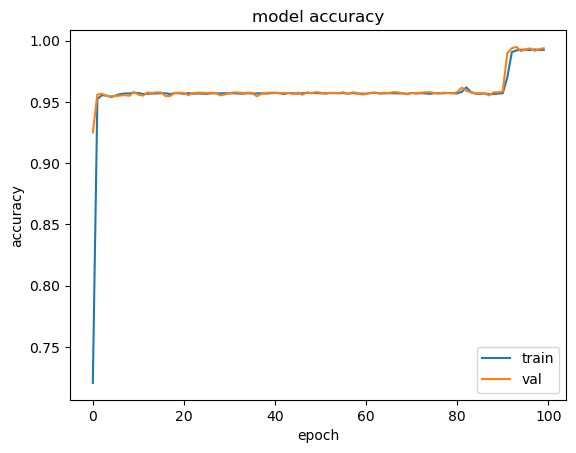

357/357 [==============================] - 0s 580us/step
Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [16]:
model1.fit(x=X_train_selected, y=X_train_selected, epochs=100, batch_size=32,validation_split=0.2)
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
intermediate_layer_model1 = Model(inputs=model1.input, outputs=model1.get_layer(index=1).output)
X_train_autoencoder_11_1 = intermediate_layer_model1.predict(X_train_selected)
X_test_autoencoder_11_1 = intermediate_layer_model1.predict(X_test_selected)
print("Shape of train: ",X_train_autoencoder_11_1.shape)
print("Shape of train: ",X_test_autoencoder_11_1.shape)

In [17]:
ann1 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann1.fit(X_train_autoencoder_11_1, y_train, epochs=60,validation_split=0.25)

Epoch 1/60
1069/1069 [==============================] - 3s 2ms/step - loss: 0.5858 - accuracy: 0.7068 - precision: 0.7190 - recall: 0.5363 - val_loss: 0.5254 - val_accuracy: 0.7572 - val_precision: 0.8286 - val_recall: 0.5769
Epoch 2/60
1069/1069 [==============================] - 2s 2ms/step - loss: 0.5130 - accuracy: 0.7641 - precision: 0.7893 - recall: 0.6253 - val_loss: 0.5006 - val_accuracy: 0.7841 - val_precision: 0.7693 - val_recall: 0.7396
Epoch 3/60
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4786 - accuracy: 0.7877 - precision: 0.8093 - recall: 0.6707 - val_loss: 0.4876 - val_accuracy: 0.7707 - val_precision: 0.8690 - val_recall: 0.5744
Epoch 4/60
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4641 - accuracy: 0.7957 - precision: 0.8109 - recall: 0.6924 - val_loss: 0.4640 - val_accuracy: 0.7904 - val_precision: 0.8622 - val_recall: 0.6328
Epoch 5/60
1069/1069 [==============================] - 2s 2ms/step - loss: 0.4535 - accuracy: 0

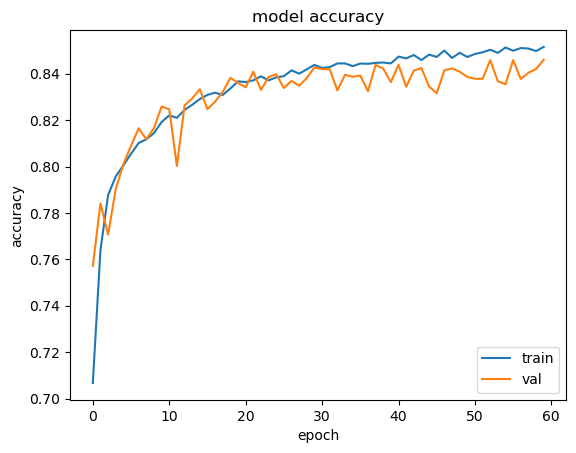

In [18]:
plt.plot(ann1.history.history['accuracy'])
plt.plot(ann1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [19]:
pred1=ann1.predict(X_test_autoencoder_11_1)
pred11=[]
for j in pred1:
    if j[0]>=0.5:
        pred11.append(1)
    else:
        pred11.append(0)
        
print(confusion_matrix(y_test,pred11))
print(classification_report(y_test,pred11))

357/357 [==============================] - 0s 748us/step
[[5779  621]
 [1180 3820]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      6400
         1.0       0.86      0.76      0.81      5000

    accuracy                           0.84     11400
   macro avg       0.85      0.83      0.84     11400
weighted avg       0.84      0.84      0.84     11400



In [18]:
# AUTOENCODER======= 19->15->11->15->19

input_dim = Input(shape = (19, ))

model2 = Sequential()
model2.add(Dense(19,activation = 'relu',input_shape=[19]))
model2.add(Dense(15,activation = 'relu'))
model2.add(Dense(11,activation = 'relu'))
model2.add(Dense(15,activation = 'relu'))
model2.add(Dense(19,activation = 'relu'))

model2.compile(optimizer=Adam(0.001),metrics=['accuracy','mae','MeanSquaredError'],loss='mse')
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 15)                300       
                                                                 
 dense_9 (Dense)             (None, 11)                176       
                                                                 
 dense_10 (Dense)            (None, 15)                180       
                                                                 
 dense_11 (Dense)            (None, 19)                304       
                                                                 
Total params: 1,340
Trainable params: 1,340
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/60
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.3681 - mae: 0.1794 - mean_squared_error: 0.0882 - val_loss: 0.0804 - val_accuracy: 0.3930 - val_mae: 0.1581 - val_mean_squared_error: 0.0804
Epoch 2/60
1140/1140 [==============================] - 2s 2ms/step - loss: 0.0761 - accuracy: 0.3860 - mae: 0.1468 - mean_squared_error: 0.0761 - val_loss: 0.0680 - val_accuracy: 0.3938 - val_mae: 0.1289 - val_mean_squared_error: 0.0680
Epoch 3/60
1140/1140 [==============================] - 2s 2ms/step - loss: 0.0682 - accuracy: 0.3880 - mae: 0.1276 - mean_squared_error: 0.0682 - val_loss: 0.0677 - val_accuracy: 0.3959 - val_mae: 0.1262 - val_mean_squared_error: 0.0677
Epoch 4/60
1140/1140 [==============================] - 2s 2ms/step - loss: 0.0680 - accuracy: 0.3884 - mae: 0.1255 - mean_squared_error: 0.0680 - val_loss: 0.0676 - val_accuracy: 0.3955 - val_mae: 0.1245 - val_mean_squared_error: 0.0676
Epoch 5/60
1140/1140 [==========================

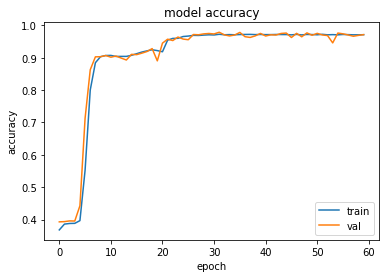

357/357 [==============================] - 0s 623us/step
Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [19]:
model2.fit(x=X_train_selected_scaled, y=X_train_selected_scaled, epochs=60, batch_size=32,validation_split=0.2)
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
intermediate_layer_model2 = Model(inputs=model2.input, outputs=model2.get_layer(index=2).output)
X_train_autoencoder_11_2 = intermediate_layer_model2.predict(X_train_selected_scaled)
X_test_autoencoder_11_2 = intermediate_layer_model2.predict(X_test_selected_scaled)
print("Shape of train: ",X_train_autoencoder_11_2.shape)
print("Shape of train: ",X_test_autoencoder_11_2.shape)

In [20]:
ann2 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann2.fit(X_train_autoencoder_11_2, y_train, epochs=60,validation_split=0.25)

Epoch 1/60
1069/1069 [==============================] - 4s 3ms/step - loss: 0.6304 - accuracy: 0.6385 - precision_1: 0.6547 - recall_1: 0.3836 - val_loss: 0.5665 - val_accuracy: 0.7249 - val_precision_1: 0.7584 - val_recall_1: 0.5281
Epoch 2/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5016 - accuracy: 0.7830 - precision_1: 0.8161 - recall_1: 0.6564 - val_loss: 0.4426 - val_accuracy: 0.8348 - val_precision_1: 0.8381 - val_recall_1: 0.7630
Epoch 3/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4203 - accuracy: 0.8314 - precision_1: 0.8607 - recall_1: 0.7376 - val_loss: 0.3994 - val_accuracy: 0.8502 - val_precision_1: 0.8429 - val_recall_1: 0.8006
Epoch 4/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3921 - accuracy: 0.8426 - precision_1: 0.8662 - recall_1: 0.7611 - val_loss: 0.3721 - val_accuracy: 0.8548 - val_precision_1: 0.8886 - val_recall_1: 0.7571
Epoch 5/60
1069/1069 [==============================] - 3s 3ms/s

Epoch 36/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2627 - accuracy: 0.8950 - precision_1: 0.8918 - recall_1: 0.8675 - val_loss: 0.2795 - val_accuracy: 0.8907 - val_precision_1: 0.9269 - val_recall_1: 0.8096
Epoch 37/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2638 - accuracy: 0.8949 - precision_1: 0.8913 - recall_1: 0.8677 - val_loss: 0.2599 - val_accuracy: 0.9026 - val_precision_1: 0.8954 - val_recall_1: 0.8757
Epoch 38/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2617 - accuracy: 0.8960 - precision_1: 0.8923 - recall_1: 0.8693 - val_loss: 0.2671 - val_accuracy: 0.8982 - val_precision_1: 0.9135 - val_recall_1: 0.8428
Epoch 39/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2606 - accuracy: 0.8963 - precision_1: 0.8914 - recall_1: 0.8713 - val_loss: 0.2698 - val_accuracy: 0.8988 - val_precision_1: 0.8713 - val_recall_1: 0.8969
Epoch 40/60
1069/1069 [==============================] - 3s 

In [21]:
pred2=ann2.predict(X_test_autoencoder_11_2)
pred12=[]
for j in pred2:
    if j[0]>=0.5:
        pred12.append(1)
    else:
        pred12.append(0)
        
print(confusion_matrix(y_test,pred12))
print(classification_report(y_test,pred12))

357/357 [==============================] - 0s 754us/step
[[5922  478]
 [ 555 4445]]
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      6400
         1.0       0.90      0.89      0.90      5000

    accuracy                           0.91     11400
   macro avg       0.91      0.91      0.91     11400
weighted avg       0.91      0.91      0.91     11400



In [22]:
# AUTOENCODER======= 19->17->15->11->15->17->19

input_dim = Input(shape = (19, ))

model3 = Sequential()
model3.add(Dense(19,activation = 'relu',input_shape=[19]))
model3.add(Dense(17,activation = 'relu'))
model3.add(Dense(15,activation = 'relu'))
model3.add(Dense(11,activation = 'relu'))
model3.add(Dense(15,activation = 'relu'))
model3.add(Dense(17,activation = 'relu'))
model3.add(Dense(19,activation = 'relu'))

model3.compile(optimizer=Adam(0.001),metrics=['accuracy','mae','MeanSquaredError'],loss='mse')
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 19)                380       
                                                                 
 dense_17 (Dense)            (None, 17)                340       
                                                                 
 dense_18 (Dense)            (None, 15)                270       
                                                                 
 dense_19 (Dense)            (None, 11)                176       
                                                                 
 dense_20 (Dense)            (None, 15)                180       
                                                                 
 dense_21 (Dense)            (None, 17)                272       
                                                                 
 dense_22 (Dense)            (None, 19)               

Epoch 1/60
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0542 - accuracy: 0.3562 - mae: 0.1120 - mean_squared_error: 0.0542 - val_loss: 0.0467 - val_accuracy: 0.3930 - val_mae: 0.0909 - val_mean_squared_error: 0.0467
Epoch 2/60
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0469 - accuracy: 0.3867 - mae: 0.0908 - mean_squared_error: 0.0469 - val_loss: 0.0463 - val_accuracy: 0.3930 - val_mae: 0.0897 - val_mean_squared_error: 0.0463
Epoch 3/60
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.4006 - mae: 0.0887 - mean_squared_error: 0.0464 - val_loss: 0.0457 - val_accuracy: 0.4268 - val_mae: 0.0860 - val_mean_squared_error: 0.0457
Epoch 4/60
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.4235 - mae: 0.0864 - mean_squared_error: 0.0461 - val_loss: 0.0457 - val_accuracy: 0.4304 - val_mae: 0.0857 - val_mean_squared_error: 0.0457
Epoch 5/60
1140/1140 [==========================

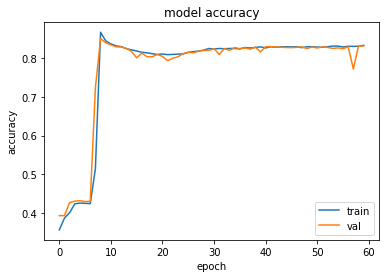

357/357 [==============================] - 0s 670us/step
Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [23]:
model3.fit(x=X_train_selected_scaled, y=X_train_selected_scaled, epochs=60, batch_size=32,validation_split=0.2)
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
intermediate_layer_model = Model(inputs=model3.input, outputs=model3.get_layer(index=3).output)
X_train_autoencoder_11_3 = intermediate_layer_model.predict(X_train_selected_scaled)
X_test_autoencoder_11_3 = intermediate_layer_model.predict(X_test_selected_scaled)
print("Shape of train: ",X_train_autoencoder_11_3.shape)
print("Shape of train: ",X_test_autoencoder_11_3.shape)

In [24]:
ann3 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann3.fit(X_train_autoencoder_11_3, y_train, epochs=60,validation_split=0.25)

Epoch 1/60
1069/1069 [==============================] - 4s 3ms/step - loss: 0.6525 - accuracy: 0.6101 - precision_2: 0.6208 - recall_2: 0.3006 - val_loss: 0.6150 - val_accuracy: 0.6543 - val_precision_2: 0.6237 - val_recall_2: 0.4930
Epoch 2/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5741 - accuracy: 0.7124 - precision_2: 0.7228 - recall_2: 0.5655 - val_loss: 0.5248 - val_accuracy: 0.7637 - val_precision_2: 0.7728 - val_recall_2: 0.6375
Epoch 3/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5139 - accuracy: 0.7639 - precision_2: 0.7853 - recall_2: 0.6403 - val_loss: 0.4909 - val_accuracy: 0.7780 - val_precision_2: 0.7892 - val_recall_2: 0.6595
Epoch 4/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4941 - accuracy: 0.7720 - precision_2: 0.7966 - recall_2: 0.6495 - val_loss: 0.4774 - val_accuracy: 0.7861 - val_precision_2: 0.8442 - val_recall_2: 0.6160
Epoch 5/60
1069/1069 [==============================] - 3s 3ms/s

Epoch 36/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4071 - accuracy: 0.8209 - precision_2: 0.8328 - recall_2: 0.7437 - val_loss: 0.3932 - val_accuracy: 0.8325 - val_precision_2: 0.8346 - val_recall_2: 0.7610
Epoch 37/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4061 - accuracy: 0.8213 - precision_2: 0.8322 - recall_2: 0.7457 - val_loss: 0.3924 - val_accuracy: 0.8332 - val_precision_2: 0.8316 - val_recall_2: 0.7671
Epoch 38/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4053 - accuracy: 0.8208 - precision_2: 0.8306 - recall_2: 0.7464 - val_loss: 0.3926 - val_accuracy: 0.8318 - val_precision_2: 0.8567 - val_recall_2: 0.7310
Epoch 39/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4029 - accuracy: 0.8221 - precision_2: 0.8317 - recall_2: 0.7486 - val_loss: 0.4081 - val_accuracy: 0.8226 - val_precision_2: 0.8831 - val_recall_2: 0.6769
Epoch 40/60
1069/1069 [==============================] - 3s 

In [25]:
pred3=ann3.predict(X_test_autoencoder_11_3)
pred13=[]
for j in pred3:
    if j[0]>=0.5:
        pred13.append(1)
    else:
        pred13.append(0)
        
print(confusion_matrix(y_test,pred13))
print(classification_report(y_test,pred13))

357/357 [==============================] - 0s 789us/step
[[5895  505]
 [1395 3605]]
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6400
         1.0       0.88      0.72      0.79      5000

    accuracy                           0.83     11400
   macro avg       0.84      0.82      0.83     11400
weighted avg       0.84      0.83      0.83     11400



In [ ]:
[[5894  506]
 [ 939 4061]]

In [26]:
# AUTOENCODER======= 19->17->15->13->11->13->15->17->19

input_dim = Input(shape = (19, ))

model4 = Sequential()
model4.add(Dense(19,activation = 'relu',input_shape=[19]))
model4.add(Dense(17,activation = 'relu'))
model4.add(Dense(15,activation = 'relu'))
model4.add(Dense(13,activation = 'relu'))
model4.add(Dense(11,activation = 'relu'))
model4.add(Dense(13,activation = 'relu'))
model4.add(Dense(15,activation = 'relu'))
model4.add(Dense(17,activation = 'relu'))
model4.add(Dense(19,activation = 'relu'))

model4.compile(optimizer=Adam(0.001),metrics=['accuracy','mae','MeanSquaredError'],loss='mse')
print(model4.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 19)                380       
                                                                 
 dense_28 (Dense)            (None, 17)                340       
                                                                 
 dense_29 (Dense)            (None, 15)                270       
                                                                 
 dense_30 (Dense)            (None, 13)                208       
                                                                 
 dense_31 (Dense)            (None, 11)                154       
                                                                 
 dense_32 (Dense)            (None, 13)                156       
                                                                 
 dense_33 (Dense)            (None, 15)               

Epoch 1/60
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0544 - accuracy: 0.4550 - mae: 0.1319 - mean_squared_error: 0.0544 - val_loss: 0.0457 - val_accuracy: 0.7466 - val_mae: 0.1080 - val_mean_squared_error: 0.0457
Epoch 2/60
1140/1140 [==============================] - 3s 3ms/step - loss: 0.0456 - accuracy: 0.6880 - mae: 0.1080 - mean_squared_error: 0.0456 - val_loss: 0.0451 - val_accuracy: 0.6867 - val_mae: 0.1056 - val_mean_squared_error: 0.0451
Epoch 3/60
1140/1140 [==============================] - 3s 3ms/step - loss: 0.0417 - accuracy: 0.7273 - mae: 0.0944 - mean_squared_error: 0.0417 - val_loss: 0.0405 - val_accuracy: 0.6827 - val_mae: 0.0897 - val_mean_squared_error: 0.0405
Epoch 4/60
1140/1140 [==============================] - 3s 2ms/step - loss: 0.0405 - accuracy: 0.7623 - mae: 0.0889 - mean_squared_error: 0.0405 - val_loss: 0.0403 - val_accuracy: 0.7951 - val_mae: 0.0875 - val_mean_squared_error: 0.0403
Epoch 5/60
1140/1140 [==========================

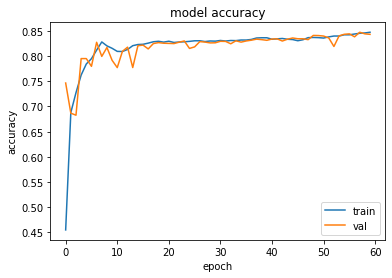

357/357 [==============================] - 0s 717us/step
Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [27]:
model4.fit(x=X_train_selected_scaled, y=X_train_selected_scaled, epochs=60, batch_size=32,validation_split=0.2)
plt.plot(model4.history.history['accuracy'])
plt.plot(model4.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
intermediate_layer_model = Model(inputs=model4.input, outputs=model4.get_layer(index=4).output)
X_train_autoencoder_11_4 = intermediate_layer_model.predict(X_train_selected_scaled)
X_test_autoencoder_11_4 = intermediate_layer_model.predict(X_test_selected_scaled)
print("Shape of train: ",X_train_autoencoder_11_4.shape)
print("Shape of train: ",X_test_autoencoder_11_4.shape)

In [28]:
ann4 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann4.fit(X_train_autoencoder_11_4, y_train, epochs=60,validation_split=0.25)


Epoch 1/60
1069/1069 [==============================] - 4s 3ms/step - loss: 0.6365 - accuracy: 0.6458 - precision_3: 0.6653 - recall_3: 0.3980 - val_loss: 0.5989 - val_accuracy: 0.6839 - val_precision_3: 0.6989 - val_recall_3: 0.4648
Epoch 2/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5810 - accuracy: 0.7059 - precision_3: 0.7268 - recall_3: 0.5353 - val_loss: 0.5581 - val_accuracy: 0.7357 - val_precision_3: 0.7330 - val_recall_3: 0.6056
Epoch 3/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5352 - accuracy: 0.7480 - precision_3: 0.7869 - recall_3: 0.5887 - val_loss: 0.5094 - val_accuracy: 0.7704 - val_precision_3: 0.8290 - val_recall_3: 0.5869
Epoch 4/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4918 - accuracy: 0.7795 - precision_3: 0.8196 - recall_3: 0.6419 - val_loss: 0.4705 - val_accuracy: 0.7967 - val_precision_3: 0.8401 - val_recall_3: 0.6507
Epoch 5/60
1069/1069 [==============================] - 3s 3ms/s

Epoch 36/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3474 - accuracy: 0.8547 - precision_3: 0.8663 - recall_3: 0.7933 - val_loss: 0.3536 - val_accuracy: 0.8543 - val_precision_3: 0.8430 - val_recall_3: 0.8122
Epoch 37/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3468 - accuracy: 0.8540 - precision_3: 0.8664 - recall_3: 0.7915 - val_loss: 0.3512 - val_accuracy: 0.8555 - val_precision_3: 0.8877 - val_recall_3: 0.7600
Epoch 38/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3456 - accuracy: 0.8536 - precision_3: 0.8638 - recall_3: 0.7935 - val_loss: 0.3503 - val_accuracy: 0.8589 - val_precision_3: 0.8483 - val_recall_3: 0.8181
Epoch 39/60
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3446 - accuracy: 0.8544 - precision_3: 0.8652 - recall_3: 0.7939 - val_loss: 0.3461 - val_accuracy: 0.8574 - val_precision_3: 0.8690 - val_recall_3: 0.7867
Epoch 40/60
1069/1069 [==============================] - 3s 

In [29]:
pred4=ann4.predict(X_test_autoencoder_11_4)
pred14=[]
for j in pred4:
    if j[0]>=0.5:
        pred14.append(1)
    else:
        pred14.append(0)
        
print(confusion_matrix(y_test,pred14))
print(classification_report(y_test,pred14))

357/357 [==============================] - 0s 844us/step
[[5837  563]
 [ 967 4033]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      6400
         1.0       0.88      0.81      0.84      5000

    accuracy                           0.87     11400
   macro avg       0.87      0.86      0.86     11400
weighted avg       0.87      0.87      0.87     11400



In [ ]:
[[5527  873]
 [ 743 4257]]

## AutoEncoder by CNN Encoder and CNN Decoder

In [30]:
X_train_selected_scaled_cnn=X_train_selected_scaled.reshape(45600,19,1)
X_train_selected_scaled_cnn.shape

(45600, 19, 1)

## AutoEncoder CNN - MLP

In [32]:
# input_dim = Input(shape = (19, 1))


# cnn_encode1 = layers.Conv1D(32, 3, activation='relu', padding='same')(input_dim)
# cnn_encode2 = layers.MaxPooling1D()(cnn_encode1)
# cnn_encode3 = layers.Conv1D(16, 3, activation='relu', padding='same')(cnn_encode2)
# cnn_encode4 = layers.MaxPooling1D()(cnn_encode3)
# cnn_encoder5_flatten = layers.Flatten()(cnn_encode4)
# bottleneck = Dense(11,activation='sigmoid')(cnn_encoder5_flatten)

# ann_decoder1=Dense(15,activation='sigmoid')(bottleneck)
# ann_decoder2=Dense(19,activation='sigmoid')(ann_decoder1)

# autoencoder_cnn_ann = keras.Model(input_dim, ann_decoder2)

# autoencoder_cnn_ann.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])
# print(autoencoder_cnn_ann.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 19, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 16)             1552      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 11)                715 

In [33]:
autoencoder_cnn_ann.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=40,validation_split=0.2,verbose=2)

Epoch 1/40
1140/1140 - 7s - loss: 0.0160 - accuracy: 0.3272 - mae: 0.0786 - mean_squared_error: 0.0160 - val_loss: 0.0098 - val_accuracy: 0.3777 - val_mae: 0.0582 - val_mean_squared_error: 0.0098
Epoch 2/40
1140/1140 - 2s - loss: 0.0096 - accuracy: 0.3761 - mae: 0.0579 - mean_squared_error: 0.0096 - val_loss: 0.0092 - val_accuracy: 0.3777 - val_mae: 0.0575 - val_mean_squared_error: 0.0092
Epoch 3/40
1140/1140 - 2s - loss: 0.0074 - accuracy: 0.3761 - mae: 0.0533 - mean_squared_error: 0.0074 - val_loss: 0.0055 - val_accuracy: 0.3777 - val_mae: 0.0478 - val_mean_squared_error: 0.0055
Epoch 4/40
1140/1140 - 2s - loss: 0.0045 - accuracy: 0.5718 - mae: 0.0428 - mean_squared_error: 0.0045 - val_loss: 0.0039 - val_accuracy: 0.6583 - val_mae: 0.0403 - val_mean_squared_error: 0.0039
Epoch 5/40
1140/1140 - 2s - loss: 0.0033 - accuracy: 0.6713 - mae: 0.0367 - mean_squared_error: 0.0033 - val_loss: 0.0029 - val_accuracy: 0.6690 - val_mae: 0.0350 - val_mean_squared_error: 0.0029
Epoch 6/40
1140/1140

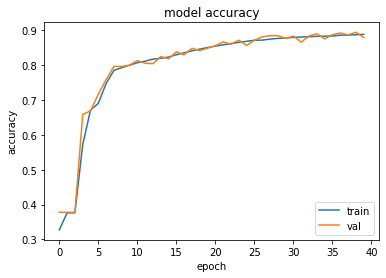

In [34]:
plt.plot(autoencoder_cnn_ann.history.history['accuracy'])
plt.plot(autoencoder_cnn_ann.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [36]:
X_test_selected_scaled_cnn=X_test_selected_scaled.reshape(11400, 19,1)
print(X_test_selected_scaled_cnn.shape)

(11400, 19, 1)


In [36]:
intermediate_layer_model = Model(inputs=autoencoder_cnn_ann.input, outputs=autoencoder_cnn_ann.get_layer(index=6).output)
X_train_autoencoder_cnn_ann_11_4 = intermediate_layer_model.predict(X_train_selected_scaled_cnn)
X_test_autoencoder_cnn_ann_11_4 = intermediate_layer_model.predict(X_test_selected_scaled_cnn)
print("Shape of train: ",X_train_autoencoder_cnn_ann_11_4.shape)
print("Shape of train: ",X_test_autoencoder_cnn_ann_11_4.shape)

Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [37]:
ann5 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann5.fit(X_train_autoencoder_cnn_ann_11_4, y_train, epochs=30,validation_split=0.25)

pred=ann5.predict(X_test_autoencoder_cnn_ann_11_4)
pred5=[]
for j in pred:
    if j[0]>=0.5:
        pred5.append(1)
    else:
        pred5.append(0)
        
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

Epoch 1/30
1069/1069 [==============================] - 4s 3ms/step - loss: 0.6298 - accuracy: 0.6473 - precision_4: 0.6759 - recall_4: 0.3723 - val_loss: 0.5749 - val_accuracy: 0.7168 - val_precision_4: 0.7432 - val_recall_4: 0.5486
Epoch 2/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5219 - accuracy: 0.7660 - precision_4: 0.8041 - recall_4: 0.6150 - val_loss: 0.4679 - val_accuracy: 0.8159 - val_precision_4: 0.8192 - val_recall_4: 0.7485
Epoch 3/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4210 - accuracy: 0.8337 - precision_4: 0.8764 - recall_4: 0.7215 - val_loss: 0.3833 - val_accuracy: 0.8587 - val_precision_4: 0.8984 - val_recall_4: 0.7670
Epoch 4/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3613 - accuracy: 0.8638 - precision_4: 0.8941 - recall_4: 0.7811 - val_loss: 0.3476 - val_accuracy: 0.8733 - val_precision_4: 0.8903 - val_recall_4: 0.8136
Epoch 5/30
1069/1069 [==============================] - 3s 3ms/s

### Slight Updation of CNN - ANN Autoencoder

In [38]:
# input_dim = Input(shape = (19, 1))


# cnn_encode1 = layers.Conv1D(32, 3, activation='relu', padding='same')(input_dim)
# cnn_encode2 = layers.MaxPooling1D()(cnn_encode1)
# cnn_encode3 = layers.Conv1D(16, 3, activation='relu', padding='same')(cnn_encode2)
# cnn_encode4 = layers.MaxPooling1D()(cnn_encode3)
# cnn_encoder5_flatten = layers.Flatten()(cnn_encode4)
# ann_enocder6=Dense(32,activation='relu')(cnn_encoder5_flatten)
# bottleneck = Dense(11,activation='sigmoid')(ann_enocder6)
# ann_decoder0=Dense(14,activation='sigmoid')(bottleneck)
# ann_decoder1=Dense(17,activation='sigmoid')(ann_decoder0)
# ann_decoder2=Dense(19,activation='sigmoid')(ann_decoder1)

# autoencoder_cnn_ann1 = keras.Model(input_dim, ann_decoder2)

# autoencoder_cnn_ann1.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])
# print(autoencoder_cnn_ann1.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 19, 1)]           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 9, 16)             1552      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080

In [39]:
autoencoder_cnn_ann1.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=40,validation_split=0.2,verbose=2)

Epoch 1/40
1140/1140 - 3s - loss: 0.0161 - accuracy: 0.3572 - mae: 0.0776 - mean_squared_error: 0.0161 - val_loss: 0.0098 - val_accuracy: 0.3777 - val_mae: 0.0583 - val_mean_squared_error: 0.0098
Epoch 2/40
1140/1140 - 2s - loss: 0.0093 - accuracy: 0.3761 - mae: 0.0574 - mean_squared_error: 0.0093 - val_loss: 0.0081 - val_accuracy: 0.3777 - val_mae: 0.0544 - val_mean_squared_error: 0.0081
Epoch 3/40
1140/1140 - 2s - loss: 0.0063 - accuracy: 0.4125 - mae: 0.0493 - mean_squared_error: 0.0063 - val_loss: 0.0052 - val_accuracy: 0.3777 - val_mae: 0.0459 - val_mean_squared_error: 0.0052
Epoch 4/40
1140/1140 - 2s - loss: 0.0045 - accuracy: 0.4916 - mae: 0.0428 - mean_squared_error: 0.0045 - val_loss: 0.0043 - val_accuracy: 0.6419 - val_mae: 0.0408 - val_mean_squared_error: 0.0043
Epoch 5/40
1140/1140 - 2s - loss: 0.0042 - accuracy: 0.6775 - mae: 0.0404 - mean_squared_error: 0.0042 - val_loss: 0.0042 - val_accuracy: 0.7240 - val_mae: 0.0404 - val_mean_squared_error: 0.0042
Epoch 6/40
1140/1140

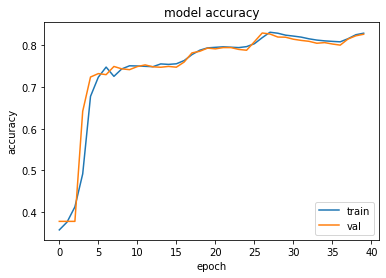

In [40]:
plt.plot(autoencoder_cnn_ann1.history.history['accuracy'])
plt.plot(autoencoder_cnn_ann1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [41]:
intermediate_layer_model = Model(inputs=autoencoder_cnn_ann1.input, outputs=autoencoder_cnn_ann1.get_layer(index=7).output)
X_train_autoencoder_cnn_ann_11_5 = intermediate_layer_model.predict(X_train_selected_scaled_cnn)
X_test_autoencoder_cnn_ann_11_5 = intermediate_layer_model.predict(X_test_selected_scaled_cnn)
print("Shape of train: ",X_train_autoencoder_cnn_ann_11_5.shape)
print("Shape of train: ",X_test_autoencoder_cnn_ann_11_5.shape)

Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [42]:
ann6 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann6.fit(X_train_autoencoder_cnn_ann_11_5, y_train, epochs=30,validation_split=0.25)

pred=ann6.predict(X_test_autoencoder_cnn_ann_11_5)
pred6=[]
for j in pred:
    if j[0]>=0.5:
        pred6.append(1)
    else:
        pred6.append(0)
        
print(confusion_matrix(y_test,pred6))
print(classification_report(y_test,pred6))

Epoch 1/30
1069/1069 [==============================] - 4s 3ms/step - loss: 0.6200 - accuracy: 0.6608 - precision_5: 0.6820 - recall_5: 0.4208 - val_loss: 0.5575 - val_accuracy: 0.7288 - val_precision_5: 0.7209 - val_recall_5: 0.6302
Epoch 2/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.5192 - accuracy: 0.7638 - precision_5: 0.7881 - recall_5: 0.6293 - val_loss: 0.4805 - val_accuracy: 0.7909 - val_precision_5: 0.8069 - val_recall_5: 0.6925
Epoch 3/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4650 - accuracy: 0.7998 - precision_5: 0.8280 - recall_5: 0.6845 - val_loss: 0.4547 - val_accuracy: 0.7984 - val_precision_5: 0.8831 - val_recall_5: 0.6268
Epoch 4/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4346 - accuracy: 0.8196 - precision_5: 0.8461 - recall_5: 0.7182 - val_loss: 0.4320 - val_accuracy: 0.8176 - val_precision_5: 0.7947 - val_recall_5: 0.7920
Epoch 5/30
1069/1069 [==============================] - 3s 3ms/s

In [ ]:
[[5782  618]
 [ 731 4269]]

In [497]:
# ALPHA = 0.8
# GAMMA = 2

# class FocalLoss(tf.keras.Model):
#     def _init_(self, weight=None, size_average=True):
#         super(FocalLoss, self)._init_()

#     def call(self, inputs, targets, alpha=ALPHA, gamma=GAMMA, smooth=1):
        
#         #comment out if your model contains a sigmoid or equivalent activation layer
# #         inputs = torch.sigmoid(inputs)       
        
#         #flatten label and prediction tensors
# #         inputs = inputs.view(-1)
# #         targets = targets.view(-1)
        
#         #first compute binary cross-entropy 
#         BCE = tf.keras.losses.binary_crossentropy(inputs, targets)
#         BCE_EXP = tf.exp(-BCE)
#         focal_loss = alpha * (1-BCE_EXP)**gamma * BCE
                       
#         return focal_loss

In [ ]:
### Cnn ann autoencoder using focal loss
# input_dim = Input(shape = (19, 1))


# cnn_encode1 = layers.Conv1D(32, 3, activation='relu', padding='same')(input_dim)
# cnn_encode2 = layers.MaxPooling1D()(cnn_encode1)
# cnn_encode3 = layers.Conv1D(16, 3, activation='relu', padding='same')(cnn_encode2)
# cnn_encode4 = layers.MaxPooling1D()(cnn_encode3)
# cnn_encode5 = layers.Conv1D(8, 3, activation='relu', padding='same')(cnn_encode4)
# cnn_encode6 = layers.MaxPooling1D()(cnn_encode5)
# cnn_encoder5_flatten = layers.Flatten()(cnn_encode6)
# ann_enocder6=Dense(14,activation='relu')(cnn_encoder5_flatten)
# bottleneck = Dense(11,activation='sigmoid')(ann_enocder6)
# ann_decoder0=Dense(14,activation='sigmoid')(bottleneck)
# ann_decoder1=Dense(17,activation='sigmoid')(ann_decoder0)
# ann_decoder2=Dense(19,activation='sigmoid')(ann_decoder1)

# autoencoder_cnn_ann2 = keras.Model(input_dim, ann_decoder2)

# autoencoder_cnn_ann2.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])
# print(autoencoder_cnn_ann2.summary())

In [ ]:
autoencoder_cnn_ann2.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=80,validation_split=0.2,verbose=2)

In [ ]:
plt.plot(autoencoder_cnn_ann2.history.history['accuracy'])
plt.plot(autoencoder_cnn_ann2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
intermediate_layer_model = Model(inputs=autoencoder_cnn_ann2.input, outputs=autoencoder_cnn_ann2.get_layer(index=9).output)
X_train_autoencoder_cnn_ann_11_6 = intermediate_layer_model.predict(X_train_selected_scaled_cnn)
X_test_autoencoder_cnn_ann_11_6 = intermediate_layer_model.predict(X_test_selected_scaled_cnn)
print("Shape of train: ",X_train_autoencoder_cnn_ann_11_6.shape)
print("Shape of train: ",X_test_autoencoder_cnn_ann_11_6.shape)

In [ ]:
ann7 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann7.fit(X_train_autoencoder_cnn_ann_11_6, y_train, epochs=30,validation_split=0.25)

pred=ann7.predict(X_test_autoencoder_cnn_ann_11_6)
pred7=[]
for j in pred:
    if j[0]>=0.5:
        pred7.append(1)
    else:
        pred7.append(0)
        
print(confusion_matrix(y_test,pred7))
print(classification_report(y_test,pred7))

In [ ]:
[[5962  438]
 [1144 3856]]

### CNN LSTM based Autoencoder

In [43]:
# input_dim = Input(shape = (19, 1))


# cnn_encode1 = layers.Conv1D(32, 3, activation='relu', padding='same')(input_dim)
# cnn_encode2 = layers.MaxPooling1D()(cnn_encode1)
# cnn_encode3 = layers.Conv1D(16, 3, activation='relu', padding='same')(cnn_encode2)
# cnn_encode4 = layers.MaxPooling1D()(cnn_encode3)
# # cnn_encode5 = layers.Conv1D(8, 3, activation='relu', padding='same')(cnn_encode4)
# # cnn_encode6 = layers.MaxPooling1D()(cnn_encode5)
# lstm=LSTM(32)(cnn_encode4)
# ann_decoder0=Dense(11,activation='sigmoid')(lstm)
# ann_decoder1=Dense(14,activation='sigmoid')(ann_decoder0)
# ann_decoder2=Dense(19,activation='sigmoid')(ann_decoder1)

# autoencoder_cnn_lstm = keras.Model(input_dim, ann_decoder2)

# autoencoder_cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])
# print(autoencoder_cnn_lstm.summary())

In [528]:
# autoencoder_cnn_lstm.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=40,validation_split=0.2,verbose=2)

Epoch 1/40
1140/1140 - 5s - loss: 0.0153 - accuracy: 0.4076 - mae: 0.0769 - mean_squared_error: 0.0153 - val_loss: 0.0097 - val_accuracy: 0.3791 - val_mae: 0.0580 - val_mean_squared_error: 0.0097
Epoch 2/40
1140/1140 - 3s - loss: 0.0097 - accuracy: 0.3762 - mae: 0.0580 - mean_squared_error: 0.0097 - val_loss: 0.0097 - val_accuracy: 0.3791 - val_mae: 0.0581 - val_mean_squared_error: 0.0097
Epoch 3/40
1140/1140 - 3s - loss: 0.0083 - accuracy: 0.3762 - mae: 0.0553 - mean_squared_error: 0.0083 - val_loss: 0.0052 - val_accuracy: 0.3795 - val_mae: 0.0463 - val_mean_squared_error: 0.0052
Epoch 4/40
1140/1140 - 3s - loss: 0.0042 - accuracy: 0.6006 - mae: 0.0411 - mean_squared_error: 0.0042 - val_loss: 0.0035 - val_accuracy: 0.6966 - val_mae: 0.0381 - val_mean_squared_error: 0.0035
Epoch 5/40
1140/1140 - 3s - loss: 0.0030 - accuracy: 0.6992 - mae: 0.0354 - mean_squared_error: 0.0030 - val_loss: 0.0026 - val_accuracy: 0.7185 - val_mae: 0.0330 - val_mean_squared_error: 0.0026
Epoch 6/40
1140/1140

In [44]:
# plt.plot(autoencoder_cnn_lstm.history.history['accuracy'])
# plt.plot(autoencoder_cnn_lstm.history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='lower right')
# plt.show()

In [530]:
# intermediate_layer_model = Model(inputs=autoencoder_cnn_lstm.input, outputs=autoencoder_cnn_lstm.get_layer(index=6).output)
# X_train_autoencoder_cnn_lstm_11_1 = intermediate_layer_model.predict(X_train_selected_scaled_cnn)
# X_test_autoencoder_cnn_lstm_11_1 = intermediate_layer_model.predict(X_test_selected_scaled_cnn)
# print("Shape of train: ",X_train_autoencoder_cnn_lstm_11_1.shape)
# print("Shape of train: ",X_test_autoencoder_cnn_lstm_11_1.shape)

Shape of train:  (45600, 11)
Shape of train:  (11400, 11)


In [531]:
# ann8 = keras.Sequential([
#     keras.layers.Dense(128, input_shape=(11,), activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# ann8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='binary_crossentropy',
#               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# ann8.fit(X_train_autoencoder_cnn_lstm_11_1, y_train, epochs=30,validation_split=0.25)

# pred=ann8.predict(X_test_autoencoder_cnn_lstm_11_1)
# pred8=[]
# for j in pred:
#     if j[0]>=0.5:
#         pred8.append(1)
#     else:
#         pred8.append(0)
        
# print(confusion_matrix(y_test,pred8))
# print(classification_report(y_test,pred8))

Epoch 1/30
1069/1069 [==============================] - 4s 3ms/step - loss: 0.5969 - accuracy: 0.6855 - precision_13: 0.7155 - recall_13: 0.4689 - val_loss: 0.4985 - val_accuracy: 0.7800 - val_precision_13: 0.8671 - val_recall_13: 0.5899
Epoch 2/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.4189 - accuracy: 0.8347 - precision_13: 0.8756 - recall_13: 0.7259 - val_loss: 0.3574 - val_accuracy: 0.8718 - val_precision_13: 0.8950 - val_recall_13: 0.8026
Epoch 3/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3428 - accuracy: 0.8707 - precision_13: 0.8996 - recall_13: 0.7935 - val_loss: 0.3193 - val_accuracy: 0.8826 - val_precision_13: 0.9071 - val_recall_13: 0.8166
Epoch 4/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3170 - accuracy: 0.8805 - precision_13: 0.9016 - recall_13: 0.8164 - val_loss: 0.3127 - val_accuracy: 0.8946 - val_precision_13: 0.8754 - val_recall_13: 0.8863
Epoch 5/30
1069/1069 [==========================

### Cnn Lstm based autoencoder has out performed all the models so will tune this model from now

In [564]:
# ann_cnnlstm1 = keras.Sequential([
#     keras.layers.Dense(128, input_shape=(11,), activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# ann_cnnlstm1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='binary_crossentropy',
#               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# ann_cnnlstm1.fit(X_train_autoencoder_cnn_lstm_11_1, y_train, epochs=30,validation_split=0.25)

# pred_ann_cnnlstm1=ann_cnnlstm1.predict(X_test_autoencoder_cnn_lstm_11_1)
# pred9=[]
# for j in pred_ann_cnnlstm1:
#     if j[0]>=0.5:
#         pred9.append(1)
#     else:
#         pred9.append(0)
        
# print(confusion_matrix(y_test,pred8))

Epoch 1/30
1069/1069 [==============================] - 4s 3ms/step - loss: 0.5465 - accuracy: 0.7343 - precision_15: 0.7695 - recall_15: 0.5620 - val_loss: 0.3903 - val_accuracy: 0.8471 - val_precision_15: 0.8804 - val_recall_15: 0.7547
Epoch 2/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3544 - accuracy: 0.8605 - precision_15: 0.8821 - recall_15: 0.7869 - val_loss: 0.3221 - val_accuracy: 0.8713 - val_precision_15: 0.9087 - val_recall_15: 0.7863
Epoch 3/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3162 - accuracy: 0.8763 - precision_15: 0.8863 - recall_15: 0.8233 - val_loss: 0.2959 - val_accuracy: 0.8872 - val_precision_15: 0.9010 - val_recall_15: 0.8352
Epoch 4/30
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2981 - accuracy: 0.8852 - precision_15: 0.8884 - recall_15: 0.8442 - val_loss: 0.2870 - val_accuracy: 0.8868 - val_precision_15: 0.9145 - val_recall_15: 0.8192
Epoch 5/30
1069/1069 [==========================

In [ ]:
#### Tuning the final ANN model

In [577]:
# from kerastuner import RandomSearch
# def hyper_model(hp):
#     model=keras.Sequential() # Building the ANN
#     for i in range(hp.Int('num_layers',2,8)):  # ANN must have hidden layers in between 2 to 8
#         model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=8,max_value=256,step=16),# In each hidden layers the no of neurons must be between 32 to 256
#                               activation='relu')) # activation function used
#         model.add(layers.Dense(1,activation='sigmoid'))# Since it is a regressiom problem the output neuron should be 1 and the activation function should be softmax
#         model.compile(optimizer=tf.keras.optimizers.Adam(      # Using Adam as optimizer and hypertune its parameter
#                       hp.Choice('learning_rate',[1e-1,1e-2, 1e-3, 1e-4])), # LR for Adam
#                       loss='binary_crossentropy',
#                       metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
        
#     return model

In [578]:
# tuner = RandomSearch(
#     hyper_model,
#     objective='val_accuracy', # metric used for evaluating the ANN
#     max_trials=10,
#     executions_per_trial=3,
#     directory='project',
#     project_name='log')# there will be 10 trials and inside each trial there will be 3 execution so in total 30 trials

In [579]:
# tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 8, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 256, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 256, 'step': 16, 'sampling': None}


In [580]:
# X_train_hype, X_test_hype, y_train_hype, y_test_hype =train_test_split(X_train_autoencoder_cnn_lstm_11_1,y_train,test_size=0.2,random_state=42)

In [581]:
# tuner.search(X_train_hype, y_train_hype,
#              epochs=20,
#              validation_data=(X_test_hype, y_test_hype))

Trial 10 Complete [00h 03m 14s]
val_accuracy: 0.6714546879132589

Best val_accuracy So Far: 0.90979532400767
Total elapsed time: 00h 32m 51s
INFO:tensorflow:Oracle triggered exit


In [582]:
# tuner.results_summary()

Results summary
Results in project\log
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 216
learning_rate: 0.001
units_1: 72
units_2: 72
units_3: 8
units_4: 184
Score: 0.90979532400767
Trial summary
Hyperparameters:
num_layers: 2
units_0: 184
learning_rate: 0.001
units_1: 184
units_2: 40
units_3: 8
Score: 0.9084795117378235
Trial summary
Hyperparameters:
num_layers: 5
units_0: 24
learning_rate: 0.001
units_1: 40
units_2: 248
units_3: 104
units_4: 8
Score: 0.8847953081130981
Trial summary
Hyperparameters:
num_layers: 4
units_0: 200
learning_rate: 0.0001
units_1: 200
units_2: 8
units_3: 8
Score: 0.879203220208486
Trial summary
Hyperparameters:
num_layers: 4
units_0: 24
learning_rate: 0.01
units_1: 88
units_2: 56
units_3: 136
units_4: 168
units_5: 184
units_6: 8
units_7: 104
Score: 0.6714546879132589
Trial summary
Hyperparameters:
num_layers: 4
units_0: 136
learning_rate: 0.1
units_1: 56
units_2: 136
units_3: 152
Score: 0.5614035129547119
Trial summary
Hyperpar

In [607]:
# tuned_ann1 = keras.Sequential([
#     keras.layers.Dense(216, input_shape=(11,), activation='relu'),
#     keras.layers.Dense(72, activation='relu'),
#     keras.layers.Dense(72, activation='relu'),
#     keras.layers.Dense(8, activation='relu'),
#     keras.layers.Dense(184, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# tuned_ann1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',
#               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [608]:
# tuned_ann1.fit(X_train_autoencoder_cnn_lstm_11_1, y_train, epochs=40)


Epoch 1/40
1425/1425 [==============================] - 4s 2ms/step - loss: 0.3594 - accuracy: 0.8473 - precision_8: 0.8541 - recall_8: 0.7862
Epoch 2/40
1425/1425 [==============================] - 3s 2ms/step - loss: 0.2771 - accuracy: 0.8914 - precision_8: 0.8848 - recall_8: 0.8651
Epoch 3/40
1425/1425 [==============================] - 4s 3ms/step - loss: 0.2667 - accuracy: 0.8949 - precision_8: 0.8872 - recall_8: 0.8712
Epoch 4/40
1425/1425 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.8979 - precision_8: 0.8875 - recall_8: 0.8785
Epoch 5/40
1425/1425 [==============================] - 3s 2ms/step - loss: 0.2544 - accuracy: 0.8996 - precision_8: 0.8894 - recall_8: 0.8805
Epoch 6/40
1425/1425 [==============================] - 4s 3ms/step - loss: 0.2513 - accuracy: 0.9018 - precision_8: 0.8924 - recall_8: 0.8825
Epoch 7/40
1425/1425 [==============================] - 3s 2ms/step - loss: 0.2501 - accuracy: 0.9030 - precision_8: 0.8941 - recall_8: 0.8835

In [601]:
tuned_ann1.history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_6', 'recall_6', 'val_loss', 'val_accuracy', 'val_precision_6', 'val_recall_6'])

In [609]:
# plt.figure(figsize=(10, 5))
# plt.grid(color='olive', linestyle='-.', linewidth=0.9)
# plt.plot(tuned_ann.history.history['accuracy'],linewidth=3, color = 'red',linestyle = '-')
# plt.plot(tuned_ann.history.history['val_accuracy'],linewidth=3, color = 'royalblue',linestyle = '-')

# plt.legend(["Train",'Validation'],fontsize=12,loc='lower right')
# plt.xlabel="Epoch"
# plt.ylabel="Accuracy"
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 5))
# plt.grid(color='olive', linestyle='-.', linewidth=0.9)
# plt.plot(tuned_ann.history.history['loss'],linewidth=3, color = 'red',linestyle = '-')
# plt.plot(tuned_ann.history.history['val_loss'],linewidth=3, color = 'royalblue',linestyle = '-')

# # plt.legend(["Train",'Validation'],fontsize=12,loc='upper right')
# plt.xlabel="Epoch"
# plt.ylabel="Accuracy"
# plt.show()

In [611]:
# pred_ann_tuned=tuned_ann1.predict(X_test_autoencoder_cnn_lstm_11_1)
# pred9=[]
# for j in pred_ann_tuned:
#     if j[0]>=0.5:
#         pred9.append(1)
#     else:
#         pred9.append(0)
        
# print(confusion_matrix(y_test,pred9))

[[5826  574]
 [ 408 4592]]


In [612]:
# print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      6400
         1.0       0.89      0.92      0.90      5000

    accuracy                           0.91     11400
   macro avg       0.91      0.91      0.91     11400
weighted avg       0.91      0.91      0.91     11400

